In [13]:
import os
import pandas as pd
import optuna
import torch

from debug import objective

[I 2023-01-28 15:36:34,861] A new study created in memory with name: no-name-1e27c865-3240-4f71-be88-b3ea53356265
/Users/danieloliveira/Documents/Daniel/codes/nn-var-cov-pred/src/debug.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  return loss.item()
/Users/danieloliveira/opt/anaconda3/envs/dcuoliveira/lib/python3.7/site-packages/optuna/trial/_trial.py:689: RuntimeWarning: Inconsistent parameter values for distribution with name "n_unit"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 10, 'high': 100}
  RuntimeWarning,
Running backpropagation: 100%|██████████| 10

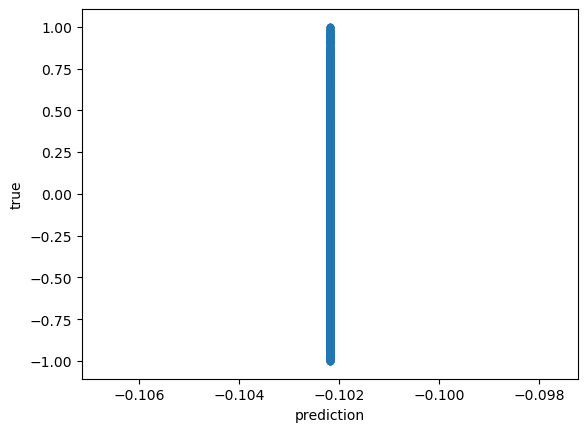

In [14]:
target_name = "betas_dgp"
target_path = os.path.join(os.getcwd(), "data", "inputs", "simple_ar")
epochs = 100
criterion = torch.nn.MSELoss()

data = pd.read_csv(os.path.join(target_path, "betadgp_corrdgp_data.csv"))

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(lambda trial: objective(trial, data, target_name, epochs, criterion), n_trials=1)
